In [19]:
import pandas as pd

df = pd.read_csv(r"C:\Users\gurra\SVM\archive\train_u6lujuX_CVtuZ9i.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [20]:
print(df)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


In [22]:
df.drop(columns=["Loan_ID"], inplace=True)

In [23]:
num_cols = [
    'ApplicantIncome',
    'CoapplicantIncome',
    'LoanAmount',
    'Loan_Amount_Term',
    'Credit_History'
]

for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)


C:\Users\gurra\AppData\Local\Temp\ipykernel_5248\2428153402.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [24]:
cat_cols = [
    'Gender',
    'Married',
    'Dependents',
    'Education',
    'Self_Employed',
    'Property_Area'
]

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


C:\Users\gurra\AppData\Local\Temp\ipykernel_5248\885813062.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [25]:
label_encoders = {}

for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [26]:
X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
#Train SVM with Linear Kernel
svm_linear=SVC(kernel='linear',C=1)
svm_linear.fit(X_train,y_train)
y_pred_linear=svm_linear.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [31]:
print("Accuracy:", accuracy_score(y_test, y_pred_linear))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))
print("\nClassification Report:\n", classification_report(y_test, y_pred_linear))

Accuracy: 0.7886178861788617

Confusion Matrix:
 [[18 25]
 [ 1 79]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [ ]:
#Train SVM with Polynomial kernel
svm_poly=SVC(kernel='poly',degree=3,C=1)
svm_poly.fit(X_train,y_train)
y_pred_poly=svm_poly.predict(X_test)

In [33]:
print("Accuracy:", accuracy_score(y_test, y_pred_poly))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_poly))
print("\nClassification Report:\n", classification_report(y_test, y_pred_poly))

Accuracy: 0.7804878048780488

Confusion Matrix:
 [[18 25]
 [ 2 78]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



In [ ]:
#Train SVM with RBF Kernel
svm_rbf=SVC(kernel='rbf',C=1,gamma='scale')
svm_rbf.fit(X_train,y_train)
y_pred_rbf=svm_rbf.predict(X_test)

In [35]:
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rbf))

Accuracy: 0.7886178861788617

Confusion Matrix:
 [[18 25]
 [ 1 79]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.decomposition import PCA


In [37]:
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [38]:
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_pca, y)


SVC()

In [39]:
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 500),
    np.linspace(y_min, y_max, 500)
)


In [40]:
Z = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


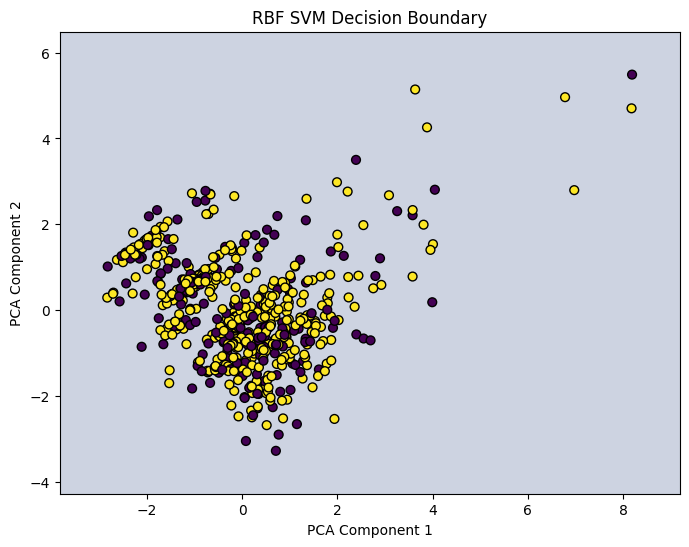

In [41]:
plt.figure(figsize=(8, 6))

# Decision regions
plt.contourf(xx, yy, Z, alpha=0.25)

# Data points
plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=y, edgecolor='k', s=40
)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("RBF SVM Decision Boundary")
plt.show()
